<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-information" data-toc-modified-id="General-information-1">General information</a></span><ul class="toc-item"><li><span><a href="#attributes" data-toc-modified-id="attributes-1.1">attributes</a></span></li></ul></li><li><span><a href="#Building-labels" data-toc-modified-id="Building-labels-2">Building labels</a></span><ul class="toc-item"><li><span><a href="#Class-ids" data-toc-modified-id="Class-ids-2.1">Class ids</a></span></li><li><span><a href="#Image-classes" data-toc-modified-id="Image-classes-2.2">Image classes</a></span></li><li><span><a href="#Attributes" data-toc-modified-id="Attributes-2.3">Attributes</a></span></li><li><span><a href="#Attribute-id-to-key/value" data-toc-modified-id="Attribute-id-to-key/value-2.4">Attribute id to key/value</a></span></li><li><span><a href="#Image-to-attributes" data-toc-modified-id="Image-to-attributes-2.5">Image to attributes</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.6">Dataset</a></span></li></ul></li></ul></div>

# Cub-200-2011 Dataset
Caltech-UCSD Birds-200-2011 - released in 2011.

- Infos at https://authors.library.caltech.edu/27452/ and https://www.vision.caltech.edu/datasets/cub_200_2011/.
- Download: [Images and annotations](https://data.caltech.edu/records/20098) (1.1 GB). Their use is restricted to non-commercial research and educational purposes.

In [1]:
#import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
#from matplotlib.patches import Rectangle
#from PIL import Image as pltImage
#from collections import Counter
#from IPython.display import Image, display

In [2]:
! wc -l images.txt

11788 images.txt


## General information
11,788 images, 15 parts, 322 binary attributes.

Images


**Parts** refer to the location on the bird

**Attributes** do not directly mention parts. Each entry associates a *part and attribute key (color)* to a *value* (buff)


To do:

[x] count images

[x] attributes/part distribution

[ ] \# P/A labels per image distribution

### attributes

In [3]:
!head -n10 attributes/attributes.txt

1 has_bill_shape::curved_(up_or_down)
2 has_bill_shape::dagger
3 has_bill_shape::hooked
4 has_bill_shape::needle
5 has_bill_shape::hooked_seabird
6 has_bill_shape::spatulate
7 has_bill_shape::all-purpose
8 has_bill_shape::cone
9 has_bill_shape::specialized
10 has_wing_color::blue


In [4]:
output = !cat attributes/attributes.txt | cut -d':' -f1 | cut -d' ' -f2 |cut -d'_' -f2- |sort | uniq -c

In [5]:
!cat attributes/attributes.txt | cut -d':' -f1 | cut -d' ' -f2 |cut -d'_' -f2- |sort | uniq -c

     15 back_color
      4 back_pattern
     15 belly_color
      4 belly_pattern
     15 bill_color
      3 bill_length
      9 bill_shape
     15 breast_color
      4 breast_pattern
     15 crown_color
     14 eye_color
     15 forehead_color
     11 head_pattern
     15 leg_color
     15 nape_color
     15 primary_color
     14 shape
      5 size
      4 tail_pattern
      6 tail_shape
     15 throat_color
     15 underparts_color
     15 under_tail_color
     15 upperparts_color
     15 upper_tail_color
     15 wing_color
      4 wing_pattern
      5 wing_shape


In [6]:
# nested list of [count, part_attribute]
tt = [i.strip().split(' ') for i in output]

# unzip
pa_counts, pa_names = map(list, zip(*natsorted(tt, reverse=True)))
pa_counts = [int(count) for count in pa_counts]
pa = range(len(pa_names))

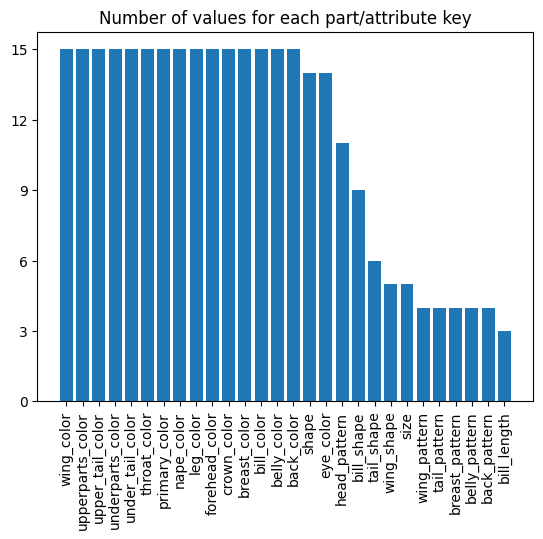

In [7]:
plt.title("Number of values for each part/attribute key")
plt.xticks(pa, pa_names, rotation='vertical')
plt.yticks(range(0,16,3))
plt.bar(pa, pa_counts)
plt.show()

In [8]:
!cat parts/parts.txt

1 back
2 beak
3 belly
4 breast
5 crown
6 forehead
7 left eye
8 left leg
9 left wing
10 nape
11 right eye
12 right leg
13 right wing
14 tail
15 throat


In [ ]:
!head -n 400 attributes/image_attribute_labels.txt

## Building labels

### Class ids

In [10]:
output = !cat classes.txt | cut -d'.' -f2
classes = [None] + output

In [11]:
classes[:3]

[None, 'Black_footed_Albatross', 'Laysan_Albatross']

### Image classes

In [12]:
output = !cat image_class_labels.txt | cut -d' ' -f2
image_to_class = [None] + list(map(int, output))

In [13]:
image_to_class[:3]

[None, 1, 1]

### Attributes

In [14]:
attributes = !cat attributes/attributes.txt | cut -d':' -f1 | cut -d' ' -f2 |cut -d'_' -f2- | uniq

In [15]:
attributes[:3]

['bill_shape', 'wing_color', 'upperparts_color']

### Attribute id to key/value

In [16]:
output = !cat attributes/attributes.txt | cut -d' ' -f2 | cut -d'_' -f2-
att_values = [None]  + [kv.split("::") for kv in output]

In [17]:
att_values[:3]

[None, ['bill_shape', 'curved_(up_or_down)'], ['bill_shape', 'dagger']]

### Image to attributes

In [18]:
output = !cat attributes/image_attribute_labels.txt | cut -d' ' -f-3
output = [list(map(int, i.split())) for i in output]
image_and_attribute = [i[:2] for i in output if i[2]]

In [20]:
# not all attributes are represented for each image!
image_and_attribute[:15]

[[1, 5],
 [1, 98],
 [1, 135],
 [1, 137],
 [1, 151],
 [1, 165],
 [1, 197],
 [1, 218],
 [1, 225],
 [1, 263],
 [1, 293],
 [1, 308],
 [2, 15],
 [2, 30],
 [2, 45]]

In [21]:
len(image_and_attribute)

371047

### Dataset

In [22]:
# df structure :
#  img_id, class, attrbute1, attribute2, ...

In [23]:
# there is no image "0", start index at 1
data_df = pd.DataFrame(data=image_to_class[1:], columns=["class"])
data_df.index += 1

In [24]:
# create attribute columns, filled with with None
for attribute in attributes:
    data_df[attribute] = None
    
# fill with attribute info we have for each image
for img_id, att_id in image_and_attribute:
    key, value = att_values[att_id]
    data_df.at[img_id, key] = value

In [25]:
data_df.tail()

,class,bill_shape,wing_color,upperparts_color,underparts_color,breast_pattern,back_color,tail_shape,upper_tail_color,head_pattern,...,size,shape,back_pattern,tail_pattern,belly_pattern,primary_color,leg_color,bill_color,crown_color,wing_pattern
11784,200,dagger,grey,grey,grey,solid,grey,squared_tail,yellow,masked,...,small_(5_-_9_in),perching-like,solid,multi-colored,solid,grey,purple,black,white,solid
11785,200,all-purpose,yellow,None,yellow,solid,None,notched_tail,yellow,capped,...,very_small_(3_-_5_in),perching-like,None,solid,solid,yellow,buff,black,buff,None
11786,200,all-purpose,olive,olive,yellow,solid,olive,None,None,eyebrow,...,very_small_(3_-_5_in),perching-like,multi-colored,None,solid,yellow,red,buff,buff,striped
11787,200,all-purpose,buff,buff,None,None,buff,notched_tail,buff,masked,...,small_(5_-_9_in),perching-like,striped,striped,None,buff,yellow,black,brown,striped
11788,200,all-purpose,buff,buff,buff,multi-colored,buff,pointed_tail,buff,eyebrow,...,small_(5_-_9_in),perching-like,multi-colored,multi-colored,multi-colored,black,orange,black,buff,multi-colored


# Sandbox

In [26]:
# train/test split
# predict class from attributes (HOW)
# feature importance _per class_ (HOW)

In [27]:
len(attributes)

28

In [28]:
sum(pa_counts)

312

In [29]:
len(pa_names)

28